Running experiment 1 with config: {'num_layers': 1, 'units': 64, 'activation': 'relu', 'loss': 'binary_crossentropy', 'use_dropout': False, 'use_l2': False}
Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step - accuracy: 0.5296 - loss: 0.6864 - val_accuracy: 0.5846 - val_loss: 0.6693
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - accuracy: 0.7010 - loss: 0.5543 - val_accuracy: 0.8242 - val_loss: 0.4085
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 88ms/step - accuracy: 0.8363 - loss: 0.3832 - val_accuracy: 0.7886 - val_loss: 0.4265
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step - accuracy: 0.8657 - loss: 0.3226 - val_accuracy: 0.7970 - val_loss: 0.4231
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 97ms/step - accuracy: 0.8709 - loss: 0.3024 - val_accuracy: 0.8852 - val_loss: 0.2964
Running experiment 2 with config: {'num_layers': 3, 'units': 64, 'activation': 'relu', 'loss': 'binary_crossentropy', 'use_dropout': False, 'use_l2': False}
Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 15

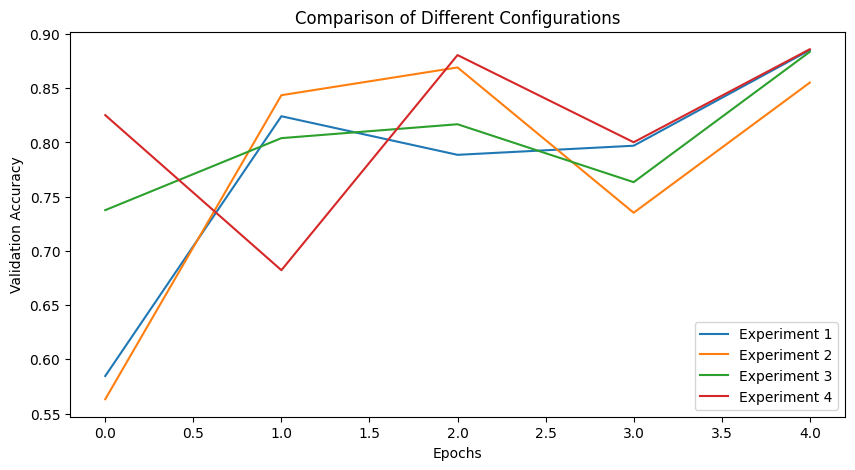

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt

# Load IMDB dataset
max_features = 10000  # Vocabulary size
maxlen = 500  # Limit reviews to 500 words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to ensure uniform input size
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

def build_model(num_layers=2, units=64, activation='relu', loss='binary_crossentropy', use_dropout=False, use_l2=False):
    """
    Function to build a neural network model with configurable parameters.

    Parameters:
    - num_layers: Number of hidden layers
    - units: Number of neurons per hidden layer
    - activation: Activation function for hidden layers
    - loss: Loss function (binary_crossentropy or mse)
    - use_dropout: Whether to apply dropout for regularization
    - use_l2: Whether to apply L2 regularization
    """
    model = keras.Sequential()
    model.add(layers.Embedding(max_features, 128, input_length=maxlen))  # Embedding layer
    model.add(layers.GlobalAveragePooling1D())  # Flatten output to match Dense input requirements

    for _ in range(num_layers):
        if use_l2:
            model.add(layers.Dense(units, activation=activation, kernel_regularizer=regularizers.l2(0.01)))  # L2 regularization
        else:
            model.add(layers.Dense(units, activation=activation))  # Standard dense layer

        if use_dropout:
            model.add(layers.Dropout(0.5))  # Dropout for reducing overfitting

    model.add(layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification

    if loss == 'mse':
        y_train_float = y_train.astype('float32')  # Convert labels to float for MSE loss
    else:
        y_train_float = y_train

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])  # Compile the model
    return model, y_train_float

# Experiment configurations with different parameters
experiments = [
    {'num_layers': 1, 'units': 64, 'activation': 'relu', 'loss': 'binary_crossentropy', 'use_dropout': False, 'use_l2': False},
    {'num_layers': 3, 'units': 64, 'activation': 'relu', 'loss': 'binary_crossentropy', 'use_dropout': False, 'use_l2': False},
    {'num_layers': 2, 'units': 64, 'activation': 'relu', 'loss': 'mse', 'use_dropout': False, 'use_l2': False},
    {'num_layers': 2, 'units': 64, 'activation': 'tanh', 'loss': 'binary_crossentropy', 'use_dropout': False, 'use_l2': False},
]

history_results = {}  # Dictionary to store results of each experiment

for i, config in enumerate(experiments):
    print(f"Running experiment {i+1} with config: {config}")
    model, y_train_float = build_model(**config)  # Build model with specific configuration
    history = model.fit(x_train, y_train_float, epochs=5, batch_size=128, validation_split=0.2, verbose=1)  # Train the model
    history_results[f'Experiment {i+1}'] = history.history  # Store history

# Plot validation accuracy results for comparison
plt.figure(figsize=(10, 5))
for key, history in history_results.items():
    plt.plot(history['val_accuracy'], label=key)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.title('Comparison of Different Configurations')
plt.show()
